# Task 1: Exploratory Data Analysis (EDA)

This notebook performs the initial data exploration for the Insurance Claims Intelligence project.

## Objectives
1. Data Summarization
2. Data Quality Assessment
3. Univariate Analysis
4. Bivariate/Multivariate Analysis
5. Outlier Detection

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path to import src modules
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data.loader import load_data
from src.utils.plots import plot_numerical_distributions, plot_correlation_matrix, plot_outliers_boxplots

%matplotlib inline

## 1. Data Summarization

In [2]:
DATA_PATH = os.path.join(project_root, 'data', 'raw', 'machine_learning_rating.txt')
print(f"Loading data from {DATA_PATH}...")

try:
    df = load_data(DATA_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Dataset not found. Please check data/raw/ location.")

Loading data from C:\Users\hp\Downloads\KAIM\KAIM W3\Insurance-claims-Intelligence\data\raw\machine_learning_rating.txt...


Data loaded successfully.


In [3]:
# Shape and Info
print(f"Shape: {df.shape}")
print("\n--- Dtypes ---")
print(df.dtypes.value_counts())
print("\n--- First 5 rows ---")
display(df.head())

Shape: (1000098, 52)

--- Dtypes ---
object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

--- First 5 rows ---


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Descriptive Statistics
print("--- Descriptive Statistics (Numerical) ---")
display(df.describe())

--- Descriptive Statistics (Numerical) ---


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


## 2. Data Quality Assessment

In [5]:
# Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("--- Missing Values ---")
print(missing)

# Percentage missing
missing_pct = (missing / len(df)) * 100
print("\n--- Percentage Missing ---")
print(missing_pct)

--- Missing Values ---
NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
WrittenOff                  641901
Converted                   641901
Rebuilt                     641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
mmcode                         552
VehicleType                    552
make                           552
VehicleIntroDate               552
NumberOfDoors                  552
bodytype                       552
kilowatts                      552
cubiccapacity                  552
Cylinders                      552
Model                          552
CapitalOutstanding               2
dtype: int64

--- Percentage Missing ---
NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
WrittenOff                  64.183810
Converted     

### Handling Strategy (Preliminary)
- Columns with >50% missing might need dropping.
- Nominal columns might need imputation with 'Unknown'.
- Numerical columns might need mean/median imputation.

## 3. Univariate Analysis

Plotting distributions for: ['RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


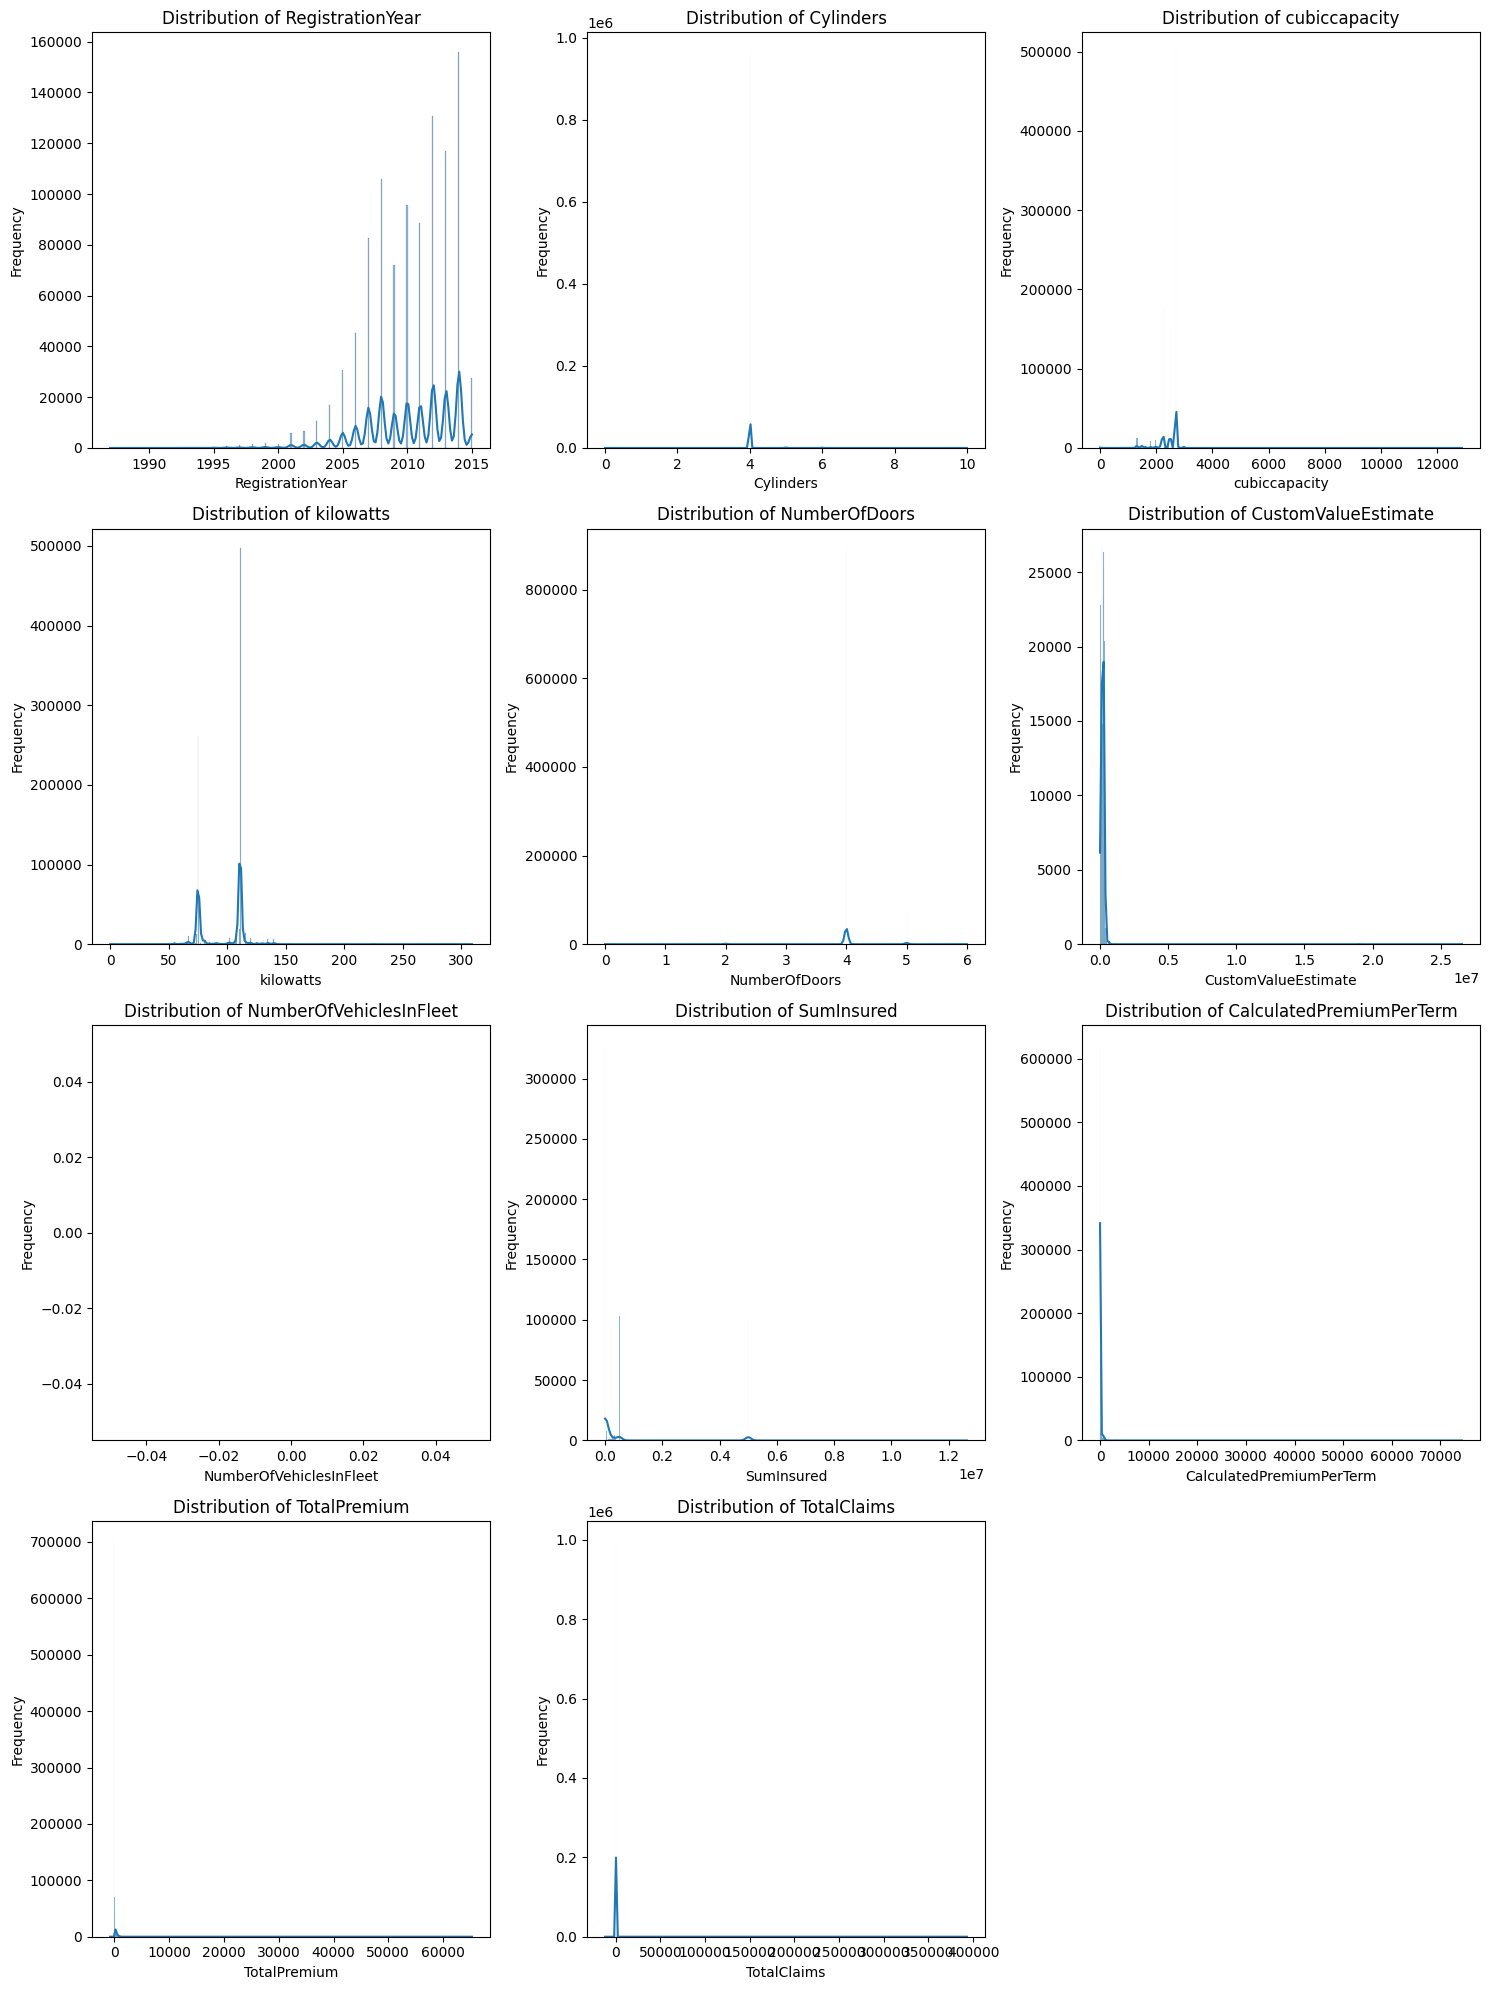

In [6]:
# Identify numerical columns for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude ID-like columns if known (e.g. UnderwrittenCoverID, PolicyID) to avoid clutter
exclude_cols = ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode']
plot_cols = [c for c in numerical_cols if c not in exclude_cols]

print(f"Plotting distributions for: {plot_cols}")
plot_numerical_distributions(df, plot_cols)

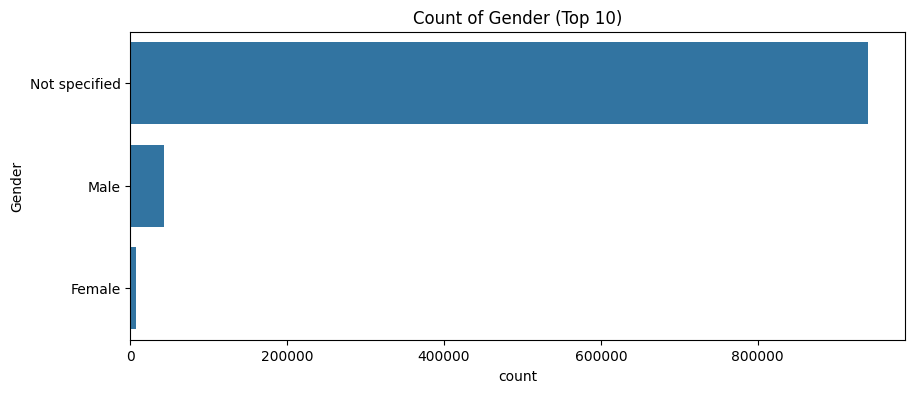

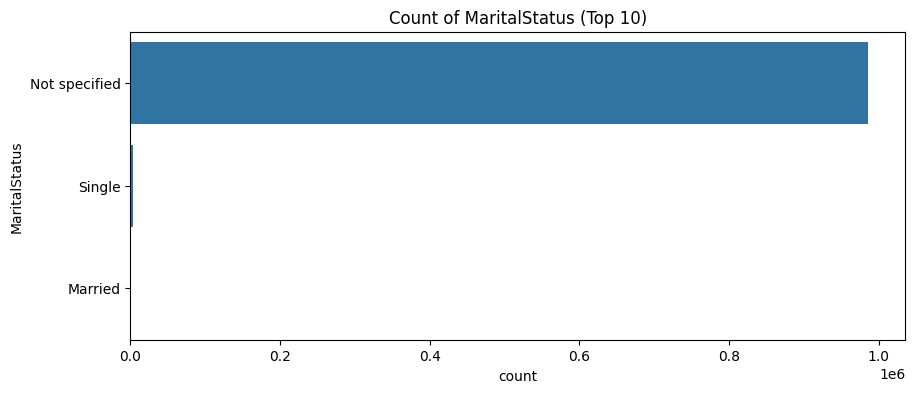

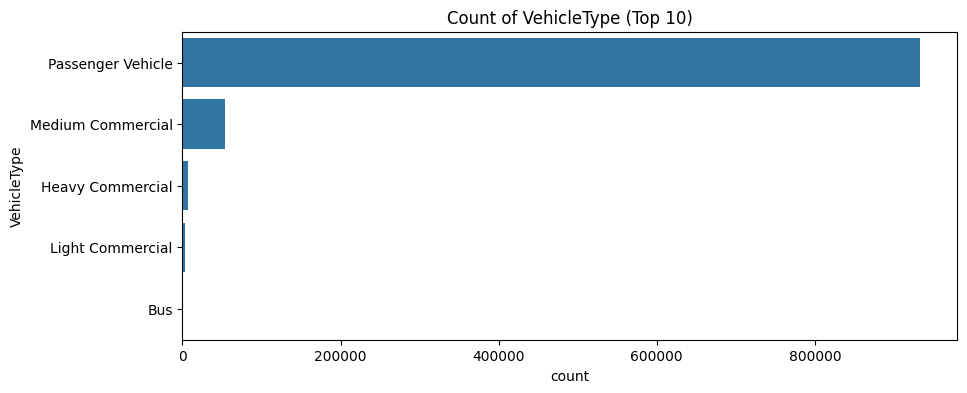

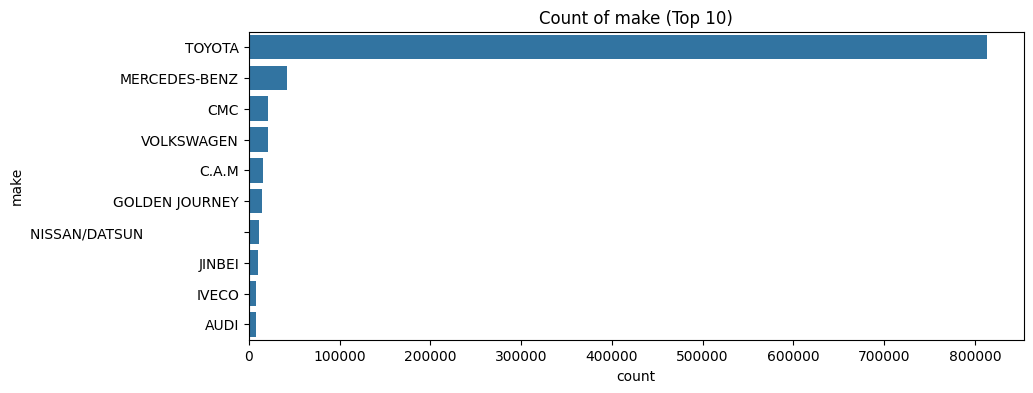

In [7]:
# Categorical Analysis (Top 10 categories for selected columns)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Select a few key ones for demo
demo_cat_cols = ['Gender', 'MaritalStatus', 'VehicleType', 'make'] # Adjust based on data availability

for col in demo_cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index)
        plt.title(f'Count of {col} (Top 10)')
        plt.show()

## 4. Bivariate & Multivariate Analysis

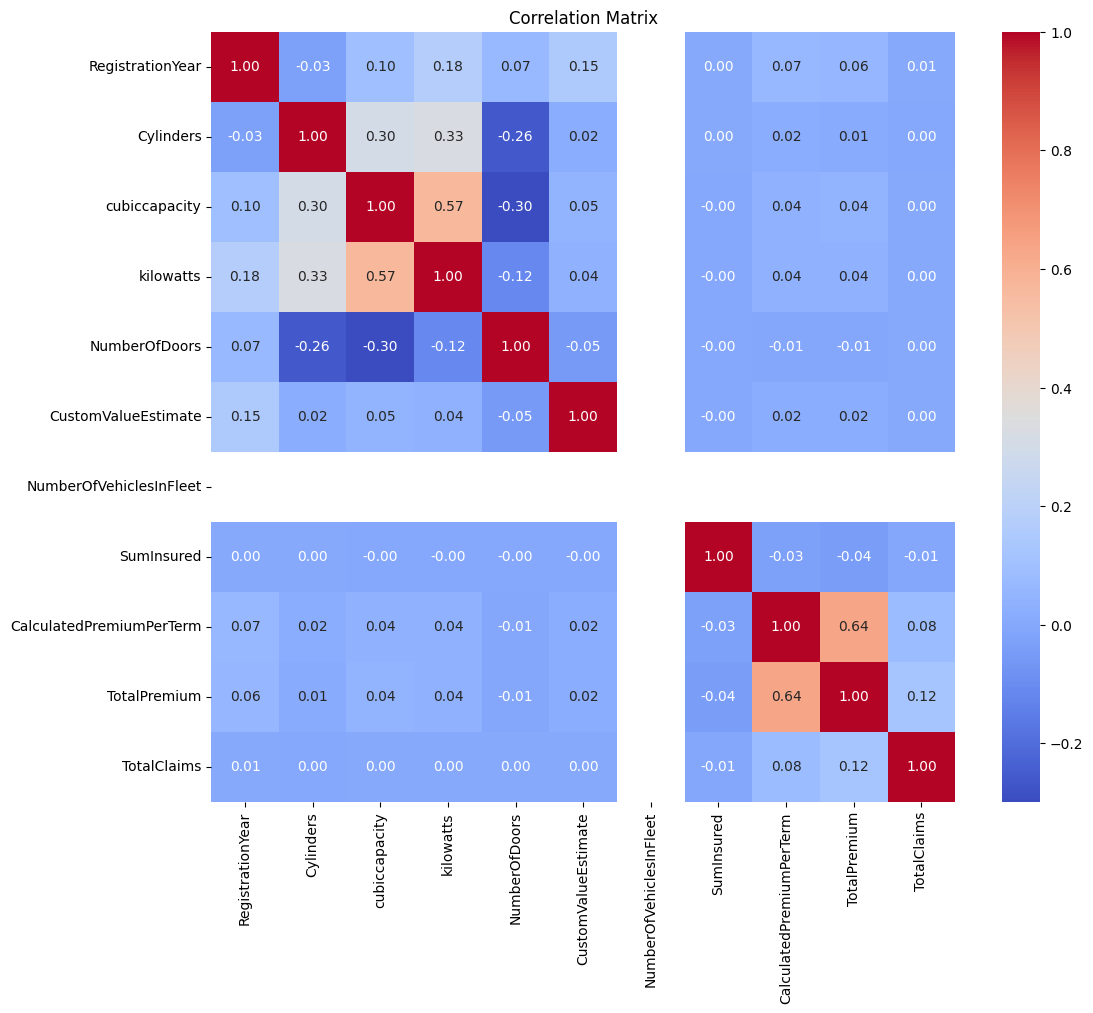

In [8]:
plot_correlation_matrix(df, plot_cols)

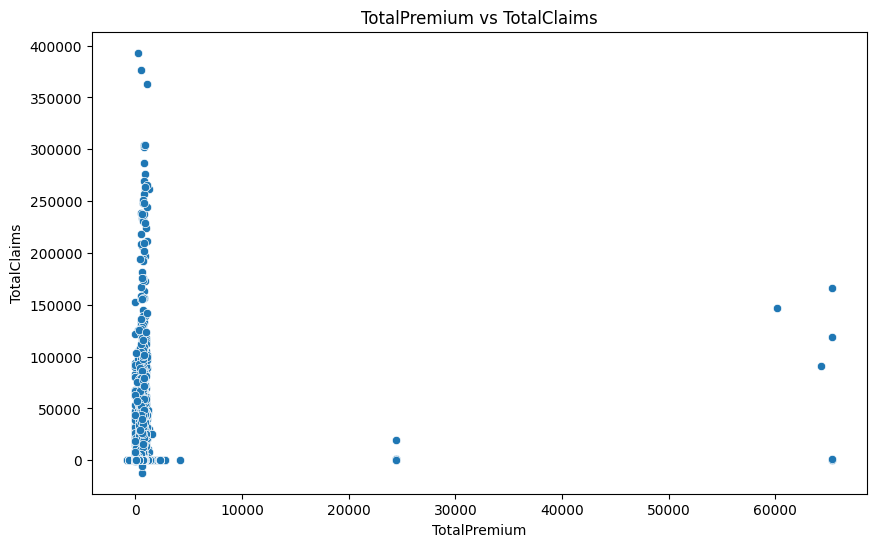

In [9]:
# Scatter Plot: TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title('TotalPremium vs TotalClaims')
plt.show()

## 5. Outlier Detection

In [10]:
plot_outliers_boxplots(df, plot_cols)